In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings; warnings.simplefilter('ignore')

In [2]:
datasets_path = '/home/monodeepdas112/container-vrts/AppliedAICourse/Datasets/'
dataset = 'haberman.csv'
haberman = pd.read_csv(datasets_path+dataset)

## Description of the dataset

In [3]:
#Converting to proper dataset column names
haberman.columns = pd.Series(['Age', 'Op_Year', 'Pos_Ax_nodes', 'Survival_Status'])

In [9]:
#Shape
print('Dataset Shape : ', haberman.shape)

#Columns in the dataset
print('\n\nColumns in the dataset : ', haberman.columns)

Dataset Shape :  (305, 4)


Columns in the dataset :  Index(['Age', 'Op_Year', 'Pos_Ax_nodes', 'Survival_Status'], dtype='object')


In [10]:
#Information about the dataset
print('\n\nInformation about the dataset : ', haberman.info())

#Description of dataset
print('\nDescription :\n', haberman.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                305 non-null int64
Op_Year            305 non-null int64
Pos_Ax_nodes       305 non-null int64
Survival_Status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Information about the dataset :  None

Description :
               Age     Op_Year  Pos_Ax_nodes  Survival_Status
count  305.000000  305.000000    305.000000       305.000000
mean    52.531148   62.849180      4.036066         1.265574
std     10.744024    3.254078      7.199370         0.442364
min     30.000000   58.000000      0.000000         1.000000
25%     44.000000   60.000000      0.000000         1.000000
50%     52.000000   63.000000      1.000000         1.000000
75%     61.000000   66.000000      4.000000         2.000000
max     83.000000   69.000000     52.000000         2.000000


As we can see there are no nulls present in the database

### Conclusions from dataset description

#### 1. Total number of samples is 305 without any null values
#### 2. There are 4 Attributes Age, Operation Year, Number of Axil nodes found, Surival Status
#### 3. Relevant statistical indormation can be found out in the cell above

### Scatter Plot Visualization

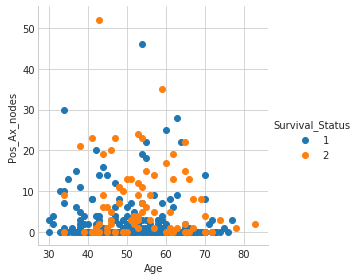

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Age", "Pos_Ax_nodes") \
   .add_legend();
plt.show();

#### Not much sense can be made out of this plot as the scatter plot seems to show no particular pattern so we can say that there exists no relation between age of the patient and the number of positive axill nodes found.

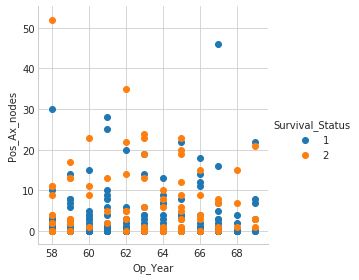

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Op_Year", "Pos_Ax_nodes") \
   .add_legend();
plt.show();

#### Even this plot is almost evenly spread with no particular pattern

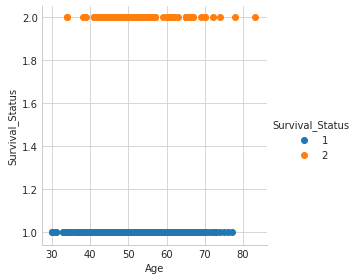

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Age", "Survival_Status") \
   .add_legend();
plt.show();

#### Same as we cannot form any kind of inference from the plot as both groups of patients share the common a large common range of age

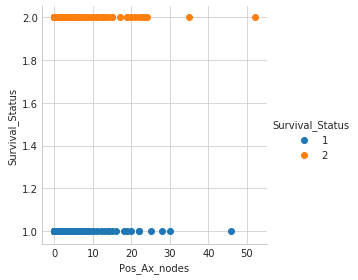

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Pos_Ax_nodes", "Survival_Status") \
   .add_legend();
plt.show();

#### Scatter plot does show a density of class 1 nearer to 0 where are the data points for class 2 seem more widely spread but not much of inference can be drawn as we still see a large common range of Pos_Ax_nodes which are occupied by both classes

### Pair-Plot

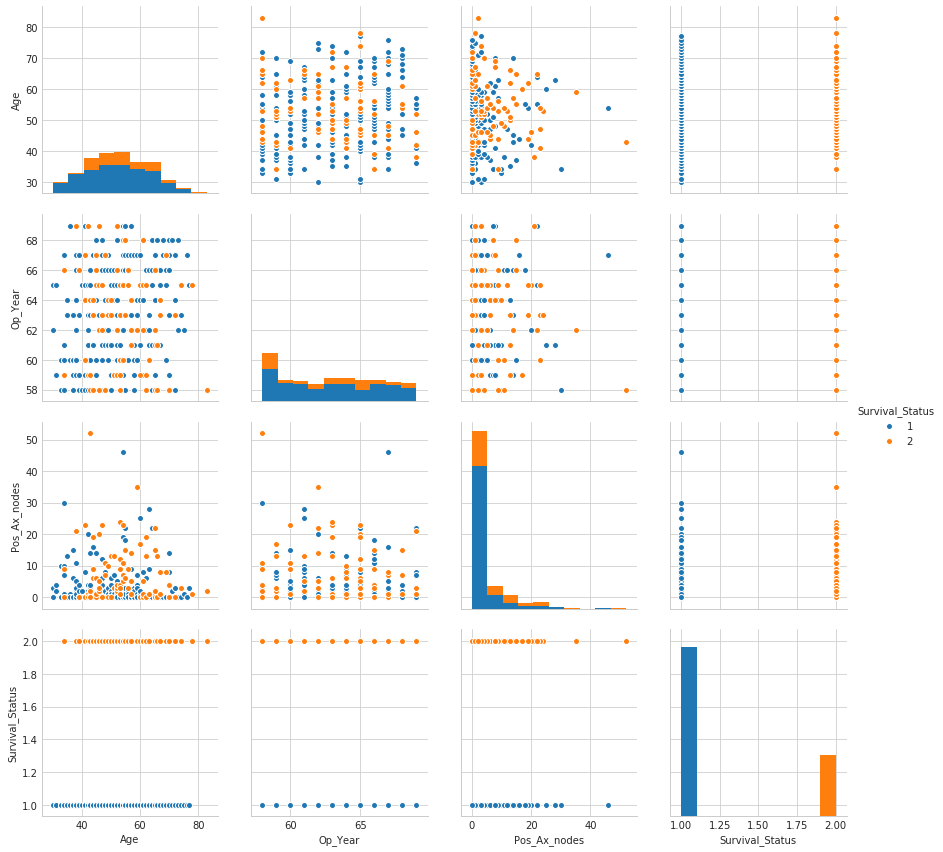

In [21]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3);
plt.show()

## PDF, CDF Analysis

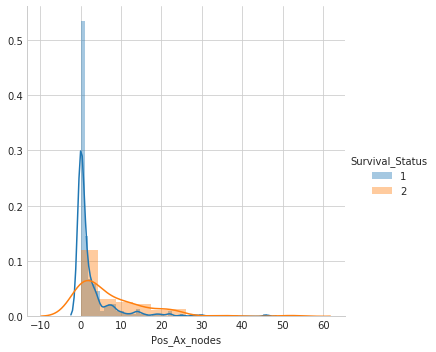

In [22]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Pos_Ax_nodes") \
   .add_legend();
plt.show();

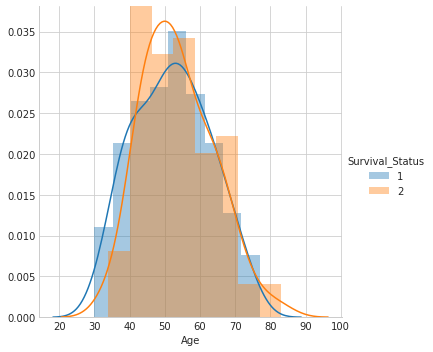

In [23]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

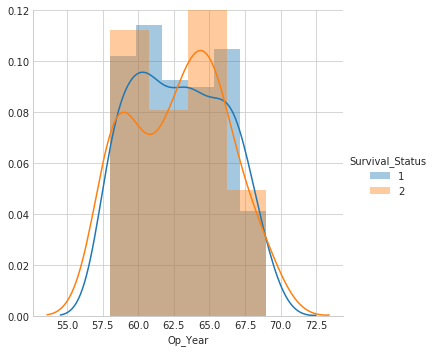

In [24]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


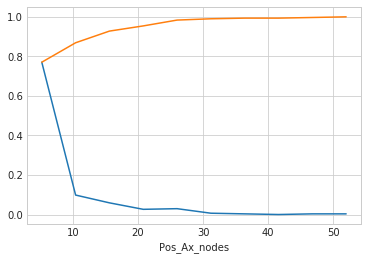

In [54]:
counts, bin_edges = np.histogram(haberman['Pos_Ax_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Pos_Ax_nodes')

plt.show();


[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


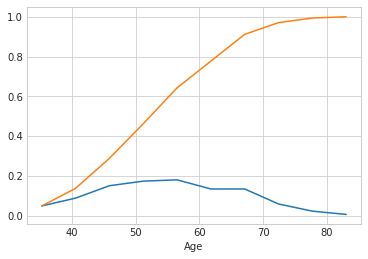

In [55]:
counts, bin_edges = np.histogram(haberman['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.show();

[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


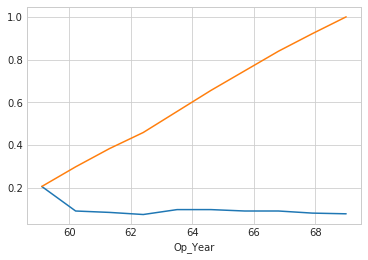

In [56]:
counts, bin_edges = np.histogram(haberman['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Op_Year')
plt.show();

#### Q. How many people lived more than 5 years and how many less than that ?

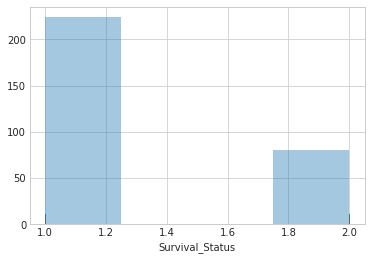

In [43]:
sns.distplot(haberman.Survival_Status, kde=False, rug=True);

#### Approx 225 people who lived more than 5 years after their operation and approx 75 people who lived less than 5 years

#### Q. How many Number of Axil nodes were found for the people who lived more than 5 years ?

In [44]:
long_lived=haberman.loc[haberman['Survival_Status'] == 1]
print('Number of people who lived for more than 5 years : \n\n', long_lived.describe())

short_lived=haberman.loc[haberman['Survival_Status']==2]
print('\n\nNumber of people who lived for less than 5 years : \n', short_lived.describe())

Number of people who lived for more than 5 years : 

               Age     Op_Year  Pos_Ax_nodes  Survival_Status
count  224.000000  224.000000    224.000000            224.0
mean    52.116071   62.857143      2.799107              1.0
std     10.937446    3.229231      5.882237              0.0
min     30.000000   58.000000      0.000000              1.0
25%     43.000000   60.000000      0.000000              1.0
50%     52.000000   63.000000      0.000000              1.0
75%     60.000000   66.000000      3.000000              1.0
max     77.000000   69.000000     46.000000              1.0


Number of people who lived for less than 5 years : 
              Age    Op_Year  Pos_Ax_nodes  Survival_Status
count  81.000000  81.000000     81.000000             81.0
mean   53.679012  62.827160      7.456790              2.0
std    10.167137   3.342118      9.185654              0.0
min    34.000000  58.000000      0.000000              2.0
25%    46.000000  59.000000      1.000000      

#### Mean Number of Positive Axil Nodes : 7.456 for the people who could not live for more than 5 years
#### Mean Number of Positive Axil Nodes : 2.799 for the people who could live for more than 5 years
#### Gives us a clear picture of the spread of the disease and thus (intuitively) can be used as a important reason for the early death of the people as in their case the disease spread a lot more.

In [45]:
#Finding out the medians
print('Median Number of Positive Axil Nodes found for class 1 : ', np.median(long_lived))
print('Median Number of Positive Axil Nodes found for class 2 : ', np.median(short_lived))

Median Number of Positive Axil Nodes found for class 1 :  30.0
Median Number of Positive Axil Nodes found for class 2 :  34.5


#### Observations are confusing as the median of both the classes differ only by 4 so it cannot be the spread of the disease that might have been the crucial reason behind their deaths. Next Step trying out Box and Violin plots so understand more about the density of the Number of positive Axial Nodes found

#### Trying out box plot to see the information visually and to determine the difference between the variance of the Num_Ax_nodes between both classes

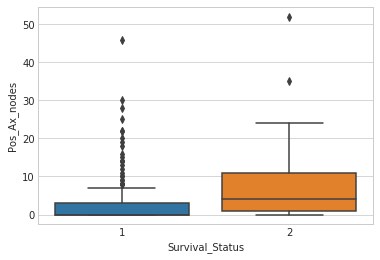

In [47]:
sns.boxplot(y='Pos_Ax_nodes', x='Survival_Status',data=haberman)
plt.show()

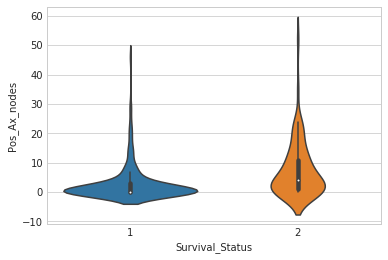

In [48]:
#Denser regions are darther and sparser regions are thinner
sns.violinplot(y='Pos_Ax_nodes', x='Survival_Status', size=10, data=haberman)
plt.show()

#### As is clearly evident from the data is that 75 percentile of the people who could not live more than 5 years had 10 positive axial nodes where are the 75 percentile of the people who could live longer than 5 years is very much lesser (approx <5)

#### As is also evident from the violin plots is that the median is really very close to the 25 percentile in case 1 and the density of people having lesser number of the positive nodes is higher and is below 10.
#### But there are more people with more positive nodes in class 2 which can be a reason why most of them could not live for more than 5 years.
#### Although there are quite some outliers in class 1 who survived to live more than 5 years despite having more number of positive axial nodes

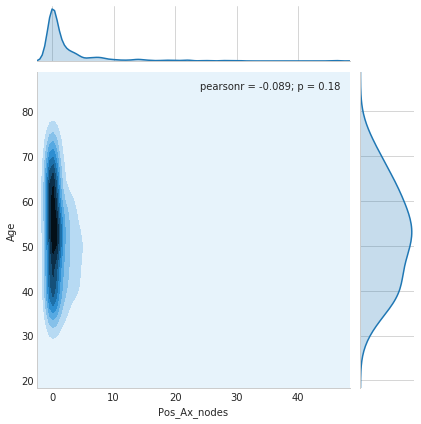

In [49]:
sns.jointplot(y='Age', x='Pos_Ax_nodes', data=long_lived, kind='kde')

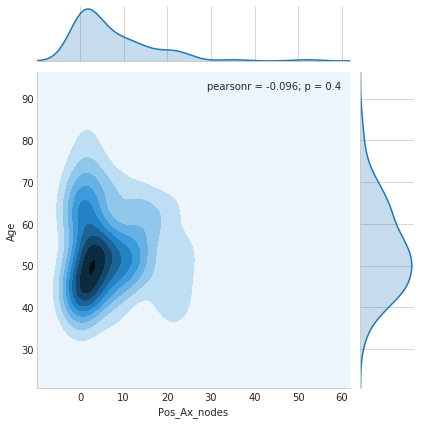

In [50]:
sns.jointplot(y='Age', x='Pos_Ax_nodes', data=short_lived, kind='kde')

#### The most dense region falls around 50 for Age in both the categories so is the same for both classes but as is evident from the contour plot is that the number positive axill nodes is widely spread for the short lived people which indicates an increased number of positive lymph axill nodes for all the age groups.

## Final Conclusion
#### The given dataset is an imbalanced dataset.
#### It is not linearly seperable using a simple if-else construct.
#### The Number of Positive Axill nodes says a lot more about the story as it shows the extent of the spread of the disease so intuitively it is something which helps determining the life expectancy as it is shown above in the data exploratory analysis.